# Import package

In [1]:
! pip install jcopdl
! pip install luwiji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for jcopdl: filename=jcopdl-1.1.9-py2.py3-none-any.whl size=16924 sha256=df7975913d5cd4009ee81ef318254746cc4891c27ec5c253bde5b974ab99cf61
  Stored in directory: /root/.cache/pip/wheels/e5/78/9d/931694cba38491e16f1a94719193211fd12a7307570d9bb562
Successfully built jcopdl
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 40.3 MB 1.3 MB/s 
     |████████████████████████████████| 1.6 MB 44.5 MB/s 
     |████████████████████████████████| 100 kB 5.5 MB/s 
  Created wheel for luwiji: filename=luwiji-1.2.1-py2.py3-none-any.whl size=40366842 sha256=71272f092cde6b03a3ed8a6a9d0e3db1f59f77d1e6bcb801785a979f3b4a851e
  Stored in directory: /root/.cache/pip/wheels/1e/e0/3e/f7071b3a603f8976df947da60bf22278b98f2346d7f5c155de
  Created wheel for jcopml: filename=jcopml-1.2.0-py2.py3-none-any.whl size=32

In [2]:
import jcopdl, luwiji
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import zipfile
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, RobustScaler, StandardScaler
import seaborn as sns

In [3]:
from torch import nn, optim

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [5]:
df = pd.read_csv('/content/diabetes.csv')
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1
767,1,93.0,70.0,31.0,NaN,30.4,0.315,23,0


In [6]:
df.isna().sum()/len(df)*100

Pregnancies                  0.000000
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64

In [7]:
df.drop(columns='Insulin',inplace=True)

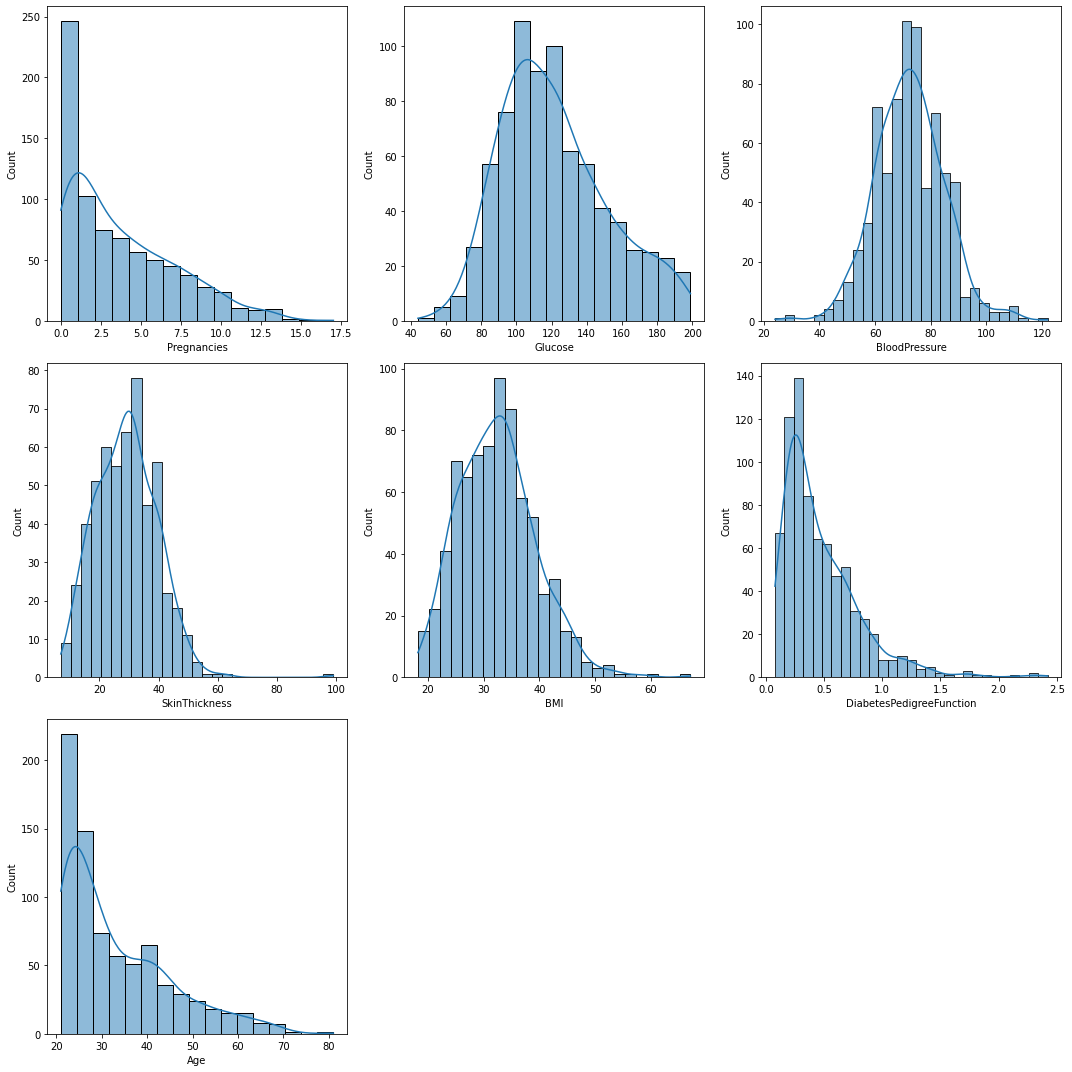

In [ ]:
cols = 3
rows = 3
num_cols = X_train.select_dtypes(exclude=['object', 'category']).columns

fig = plt.figure(figsize=(cols*5, rows*5))

for i, col in enumerate(num_cols):
    ax = fig.add_subplot(rows, cols, i+1)
    sns.histplot(x=X[col], ax=ax, kde=True)

fig.tight_layout()  
plt.show()

In [8]:
# ngecek inbalance atau ndak

df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

# Dataset Splitting

In [43]:
X = df.drop(columns='Outcome')
y = df['Outcome'].values

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 7), (154, 7), (614,), (154,))

# Preprocess data

In [37]:
from sklearn.pipeline import Pipeline

In [41]:
num_pipe = Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())    
])

In [42]:
preprocessor = ColumnTransformer([
    ('numeric',num_pipe,X_train.columns)
])

In [44]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [45]:
X_train

array([[-0.52639686, -1.25720097, -0.01899526, ..., -0.05024677,
        -0.49073479, -1.03594038],
       [ 1.58804586, -0.32633405,  0.8081742 , ..., -0.59858988,
         2.41502991,  1.48710085],
       [-0.82846011,  0.57128763, -2.16963585, ..., -0.52643947,
         0.54916055, -0.94893896],
       ...,
       [ 1.8901091 , -0.69203176,  1.13904198, ...,  1.91224437,
         1.981245  ,  0.44308379],
       [-1.13052335,  0.63777812, -0.01899526, ...,  1.45048175,
        -0.78487662, -0.33992901],
       [-1.13052335,  0.10585417,  1.96621144, ..., -1.42110454,
        -0.61552223, -1.03594038]])

In [24]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0])

# **Masuk ke workflow Pytoch**

## Dataset n Dataloader

In [46]:
X_train = torch.FloatTensor(X_train).to(device)
X_test = torch.FloatTensor(X_test).to(device)
y_train = torch.LongTensor(y_train).to(device)
y_test = torch.LongTensor(y_test).to(device)

In [47]:
from torch.utils.data import DataLoader, TensorDataset
from torch import optim,nn

In [48]:
# kita mau buat sbuah dataset n dataloader

train_set = TensorDataset(X_train,y_train)
trainloader = DataLoader(train_set, batch_size=64,shuffle=True)

test_set = TensorDataset(X_test,y_test)
testloader = DataLoader(test_set, batch_size=64)

# Train preparation

In [30]:
X_train.shape

torch.Size([614, 7])

In [49]:
model = nn.Sequential(
    nn.Linear(7,16),
    nn.ReLU(),
    nn.Linear(16,8),
    nn.ReLU(),
    nn.Linear(8,4),
    nn.ReLU(),
    nn.Linear(4,2),
    nn.LogSoftmax(1) # 1 itu dimensinya mau outputnya ke daerah mana arahnya ke --> itu dim 1 (scara biasanya psti slalu 1 ini)
).to(device)

criterion = nn.NLLLoss()
optimizer = optim.AdamW(model.parameters(),lr=0.01)

# Training Loop

In [50]:
epoch = 1000
train_cost, test_cost = [],[]
for i in range(epoch):
  model.train()
  cost = 0
  for feature,target in trainloader:
    output = model(feature)  
    loss = criterion(output, target) 
    loss.backward()

    optimizer.step() 
    optimizer.zero_grad() 

    cost +=loss.item() * feature.shape[0]  #spy prhitungannya dlm skalar
  train_cost.append(cost / len(train_set))

# ini buat yg testloader
  with torch.no_grad():
    model.eval()
    cost = 0
    for feature,target in testloader:
      output = model(feature)  
      loss = criterion(output, target)  # cuma sampe itung loss

      cost +=loss.item() * feature.shape[0]  
  test_cost.append(cost / len(test_set))

  print(f'\rEpoch: {i+1:4}/{epoch:4} | train_cost: {train_cost[-1]:.4f} | test_cost: {test_cost[-1]:.4f}', end= ' ') 

Epoch: 1000/1000 | train_cost: 0.1557 | test_cost: 2.1031 

# Cost History

In [51]:
import matplotlib.pyplot as plt

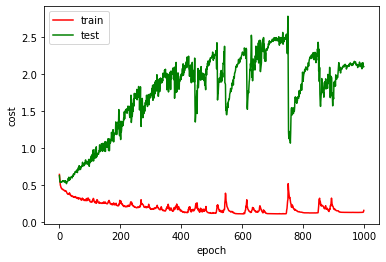

In [54]:
plt.plot(train_cost, 'r-',label='train')
plt.plot(test_cost, 'g-',label='test')
plt.xlabel('epoch');plt.ylabel('cost'); plt.legend()

In [55]:
with torch.no_grad():
  model.eval()
  output = model(X_test)

In [56]:
pred = output.argmax(1)
pred

tensor([0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
        0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
        0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
        1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
        0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0], device='cuda:0')

In [58]:
acc = (y_test==pred).to(torch.float16).mean()
acc

tensor(0.6494, device='cuda:0', dtype=torch.float16)